<a href="https://colab.research.google.com/github/savillotaa/AlgorithmsUN2023I/blob/main/LAB4/savillotaaGroup11Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile APlusB.cpp
#include <iostream>

int suma_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << suma_of_two_digits(a, b);
    return 0;
}

Writing APlusB.cpp


In [ ]:
!g++ APlusB.cpp -o APlusB
!./APlusB

^C


### Test input output files

In [ ]:
%%writefile input1.txt
13 7

Writing input1.txt


In [ ]:
%%writefile output1.txt
13

Writing output1.txt


In [ ]:
%%writefile input2.txt
9 -13

Writing input2.txt


In [ ]:
%%writefile output2.txt
7

Writing output2.txt


In [ ]:
!./APlusB < input1.txt

20

In [ ]:
!./APlusB < input2.txt

-4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

7


In [ ]:
!grep -xvFf output2.txt output1.txt 

13


In [ ]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

20


In [ ]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

-4


## Python

In [ ]:
%%writefile suma.py
# python3

def suma_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(suma_of_two_digits(a, b))

Writing suma.py


In [ ]:
!python suma.py


^C


In [ ]:
!python suma.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

20


In [ ]:
!python suma.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

-4


# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [ ]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

^C


### Test 1: Small numbers

In [ ]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [ ]:
!./max_pairwise_product < input1.txt

90


### Test 2: largest input numbers 200000 200000 in the input

In [ ]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [ ]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [ ]:
%%writefile stressTest.cpp
#include <iostream>
#include <vector>
#include <cstdlib>
#include <algorithm>

// Función que devuelve el máximo producto de dos números en un vector
long long maxPairwiseProduct(const std::vector<int>& numbers) {
    long long maxProduct = 0LL;
    long long auxProduct = 0LL;
    int n = numbers.size();

    // Recorremos todos los pares posibles de números en el vector
    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            auxProduct =  (long long) numbers[i] * numbers[j];
            if ( maxProduct < auxProduct)  {
                maxProduct = auxProduct;
            }
        }
    }

    return maxProduct;
}

// Función que devuelve el máximo producto de dos números en un vector de manera más eficiente
long long maxPairwiseProductFast(const std::vector<int>& numbers){
    int n = numbers.size();

    int maxIndex1 = -1;
    for(int i = 0; i < n; ++i){
        if ((maxIndex1 == -1) || (numbers[i] > numbers[maxIndex1]))
            maxIndex1 = i;
    }

    int maxIndex2 = -1;
    for(int j = 0; j < n; ++j) {
        if ((j != maxIndex1) && ((maxIndex2 == -1) || (numbers[j] > numbers[maxIndex2])))
            maxIndex2 = j;
    }

    return ((long long)(numbers[maxIndex1])) * numbers[maxIndex2];
}

int main() {
    int k = 0;
    while(k < 20) { // Realizamos 20 pruebas aleatorias
        int n = rand() % 20 + 2; // Elegimos un tamaño aleatorio para el vector entre 2 y 20
        std::cout << n << '\n'; // Imprimimos el tamaño del vector generado aleatoriamente
        std::vector<int> numbers; // Creamos un vector vacío para guardar los números aleatorios generados

        // Generamos los números aleatorios y los agregamos al vector
        for(int i = 0; i < n; ++i) {
            numbers.push_back(rand() % 200001);
        }

        // Imprimimos los números generados
        for(int i = 0; i < n; ++i) {
            std::cout << numbers[i] << ' ';
        }

        std::cout << "\n";

        // Obtenemos el máximo producto de dos números en el vector de dos formas distintas
        long long res1 = maxPairwiseProduct(numbers);
        long long res2 = maxPairwiseProductFast(numbers);

        // Comparamos los resultados obtenidos
        if (res1 != res2) {
            std::cout << "Wrong answer: " << res1 << ' ' << res2 << "\n";
            break;
        } else {
            std::cout << "ok\n";
        }

        ++k;
    }

    return 0;
}


Writing stressTest.cpp


Escribiendo stressTest.cpp

In [ ]:
!g++ stressTest.cpp -o stressTest
!./stressTest < input.txt

/bin/bash: input.txt: No such file or directory


### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [ ]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Writing Test2Write.cpp


In [ ]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

^C


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [ ]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                                                                                                                            //1
    std::vector<int> numbers(n);                                            
    for (int i = 0; i < n; ++i) {                                           
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";                       
    return 0;                                                              
}  

Writing test_init_vectors.cpp


In [ ]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [ ]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Writing max_pairwise_product_long_execints.cpp


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
^C


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [ ]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line

In [ ]:
%%writefile max_pairwise_efficient_solution.cpp
#include <iostream>
#include <vector>
#include <algorithm>

using namespace std;

long long max_pairwise_product(const vector<int>& numbers) {
    int n = numbers.size();
    int max_index1 = 0;
    for (int i = 1; i < n; i++) {
        if (numbers[i] > numbers[max_index1]) {
            max_index1 = i;
        }
    }
    int max_index2 = (max_index1 == 0) ? 1 : 0;
    for (int i = 0; i < n; i++) {
        if (i != max_index1 && numbers[i] > numbers[max_index2]) {
            max_index2 = i;
        }
    }

    return ((long long) numbers[max_index1]) * numbers[max_index2];
}

int main() {
    int n;
    cin >> n;

    vector<int> numbers(n);
    for (int i = 0; i < n; i++) {
        cin >> numbers[i];
    }

    cout << max_pairwise_product(numbers) << "\n";
    return 0;
}


Writing max_pairwise_efficient_solution.cpp


Test with inputs 1 and 2



In [ ]:
!g++ max_pairwise_efficient_solution.cpp -o max_pairwise_efficient_solution
!./max_pairwise_efficient_solution < input1.txt
!./max_pairwise_efficient_solution< input2.txt

90
40000000000


Test and time it with input 3

In [ ]:
!time ./max_pairwise_efficient_solution < input3.txt

39999800000

real	0m0.065s
user	0m0.061s
sys	0m0.003s


20 stress tests

In [ ]:
%%writefile max_pairwise_efficient_solution_ST.cpp
#include <iostream>
#include <vector>
#include <algorithm>

#define ll long long // Definición de "ll" como "long long"

using namespace std;

ll max_pairwise_product(const vector<int>& numbers) {
    int n = numbers.size();
    int max_index1 = 0;
    for (int i = 1; i < n; i++) {
        if (numbers[i] > numbers[max_index1]) {
            max_index1 = i;
        }
    }
    int max_index2 = (max_index1 == 0) ? 1 : 0;
    for (int i = 0; i < n; i++) {
        if (i != max_index1 && numbers[i] > numbers[max_index2]) {
            max_index2 = i;
        }
    }

    return ((ll) numbers[max_index1]) * numbers[max_index2]; // Uso de "ll" en vez de "long long"
}

int main() {
    int n;
    cin >> n;

    vector<int> numbers(n);
    for (int i = 0; i < n; i++) {
        cin >> numbers[i];
    }

    cout << max_pairwise_product(numbers) << "\n";
    return 0;
}


Writing max_pairwise_efficient_solution_ST.cpp


In [ ]:
!g++ max_pairwise_efficient_solution_ST.cpp -o max_pairwise_efficient_solution_ST
!./max_pairwise_efficient_solution_ST

^C


Count executed instructions in code and verify with inputs 1,2 and 3


Calculate estimated time by instruction and number of instructions by second

### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [ ]:
%%writefile max_pairwise_product_se.cpp
#define ll long long
#include <iostream>

int main() {
    int n;                                            //1
    std::cin >> n;                                    //1

    ll max1 = -1, max2 = -1;                   //2          
    for (int i = 0; i < n; ++i) {                     //1+2n
        ll num;                                //n
        std::cin >> num;                              //n+1

        if (num > max1) {                             //n
            max2 = max1;                              //n
            max1 = num;                               //n
        } else if (num > max2) {                      //n 
            max2 = num;                               //n
        }
    }

    ll max_product = max1 * max2;               //1
    std::cout << max_product << std::endl;             //2

    return 0;
}

Writing max_pairwise_product_se.cpp


Test with inputs 1 and 2


 

In [ ]:

!g++ max_pairwise_product_se.cpp -o max_pairwise_product_se
!./max_pairwise_product_se < input1.txt
!./max_pairwise_product_se < input2.txt

90
40000000000


Test and time it with input 3

In [ ]:
!time ./max_pairwise_product_se < input3.txt

39999800000

real	0m0.078s
user	0m0.067s
sys	0m0.004s


20 stress tests 

In [ ]:
%%writefile se_stress_test.cpp
#define ll long long
#include <iostream>
#include <vector>

using namespace std;
ll max_pairwise_product(int n, const std::vector& numbers) {
    ll max1 = -1, max2 = -1;
    for (int i = 0; i < n; ++i) {
        ll num = numbers[i];

        if (num > max1) {
            max2 = max1;
            max1 = num;
        } else if (num > max2) {
            max2 = num;
        }
    }

    return max1 * max2;
}

int main() {
    const int num_tests = 20;
    const int max_n = 11;
    const ll max_element = 100;

    std::srand(std::time(0));

    for (int test = 1; test <= num_tests; ++test) {
        int n = std::rand() % max_n + 1;
        std::vector numbers(n);

        for (int i = 0; i < n; ++i) {
            numbers[i] = std::rand() % max_element;
        }

        ll max_product = max_pairwise_product(n, numbers);
        std::cout << "Test " << test << ": Max pairwise product = " << max_product << std::endl;
    }

    return 0;
}


Overwriting se_stress_test.cpp


In [ ]:
!g++ se_stress_test.cpp -o se_stress_test
!./se_stress_test

se_stress_test.cpp:6:38: error: invalid use of template-name ‘std::vector’ without an argument list
    6 | ll max_pairwise_product(int n, const std::vector& numbers) {
      |                                      ^~~
se_stress_test.cpp:6:38: note: class template argument deduction is only available with ‘-std=c++17’ or ‘-std=gnu++17’
In file included from /usr/include/c++/9/vector:67,
                 from se_stress_test.cpp:3:
/usr/include/c++/9/bits/stl_vector.h:386:11: note: ‘template<class _Tp, class _Alloc> class std::vector’ declared here
  386 |     class vector : protected _Vector_base<_Tp, _Alloc>
      |           ^~~~~~
se_stress_test.cpp: In function ‘long long int max_pairwise_product(int, const int&)’:
se_stress_test.cpp:9:27: error: invalid types ‘const int[int]’ for array subscript
    9 |         ll num = numbers[i];
      |                           ^
se_stress_test.cpp: In function ‘int main()’:
se_stress_test.cpp:27:21: error: ‘time’ is not a member of ‘std’; did y

Count executed instructions in code and verify with inputs 1,2 and 3

In [ ]:
%%writefile max_pairwise_product_se_main.cpp
#define ll long long
#include <iostream>

int main() {
    ll execints=0LL;
    int n;                                            //1
    execints++;
    std::cin >> n;                                    //1
    execints++;

    ll max1 = -1, max2 = -1;                   //2   
    execints+=2;       
    execints++;
    for (int i = 0; i < n; ++i) {                     //1+2n
        execints+=2;
        ll num;                                //n
        execints++;
        std::cin >> num;                              //n
        execints++;
        execints++;
        if (num > max1) {                             //n
            execints++;
            max2 = max1;                              //n
            execints++;
            max1 = num;                               //n
            execints++;
        } else if (num > max2) {                      //n 
            execints++;
            max2 = num;                               //n
        }
    }

    ll max_product = max1 * max2;               //1
    execints++;
    std::cout << max_product << std::endl;             //2
    execints+=2;
    std::cout << "instructions executed: " << execints << "\n";

    return 0;
}

Overwriting max_pairwise_product_se_main.cpp


In [ ]:
!g++ max_pairwise_product_se_main.cpp -o max_pairwise_product_se_main
!./max_pairwise_product_se_main < input1.txt
!./max_pairwise_product_se_main < input2.txt
!./max_pairwise_product_se_main < input3.txt

90
instructions executed: 88
40000000000
instructions executed: 49
39999800000
instructions executed: 1600008


Calculate estimated time by instruction and number of instructions by second

In [ ]:
!time ./max_pairwise_product_se_main < input3.txt

39999800000
instructions executed: 1600008

real	0m0.059s
user	0m0.056s
sys	0m0.001s


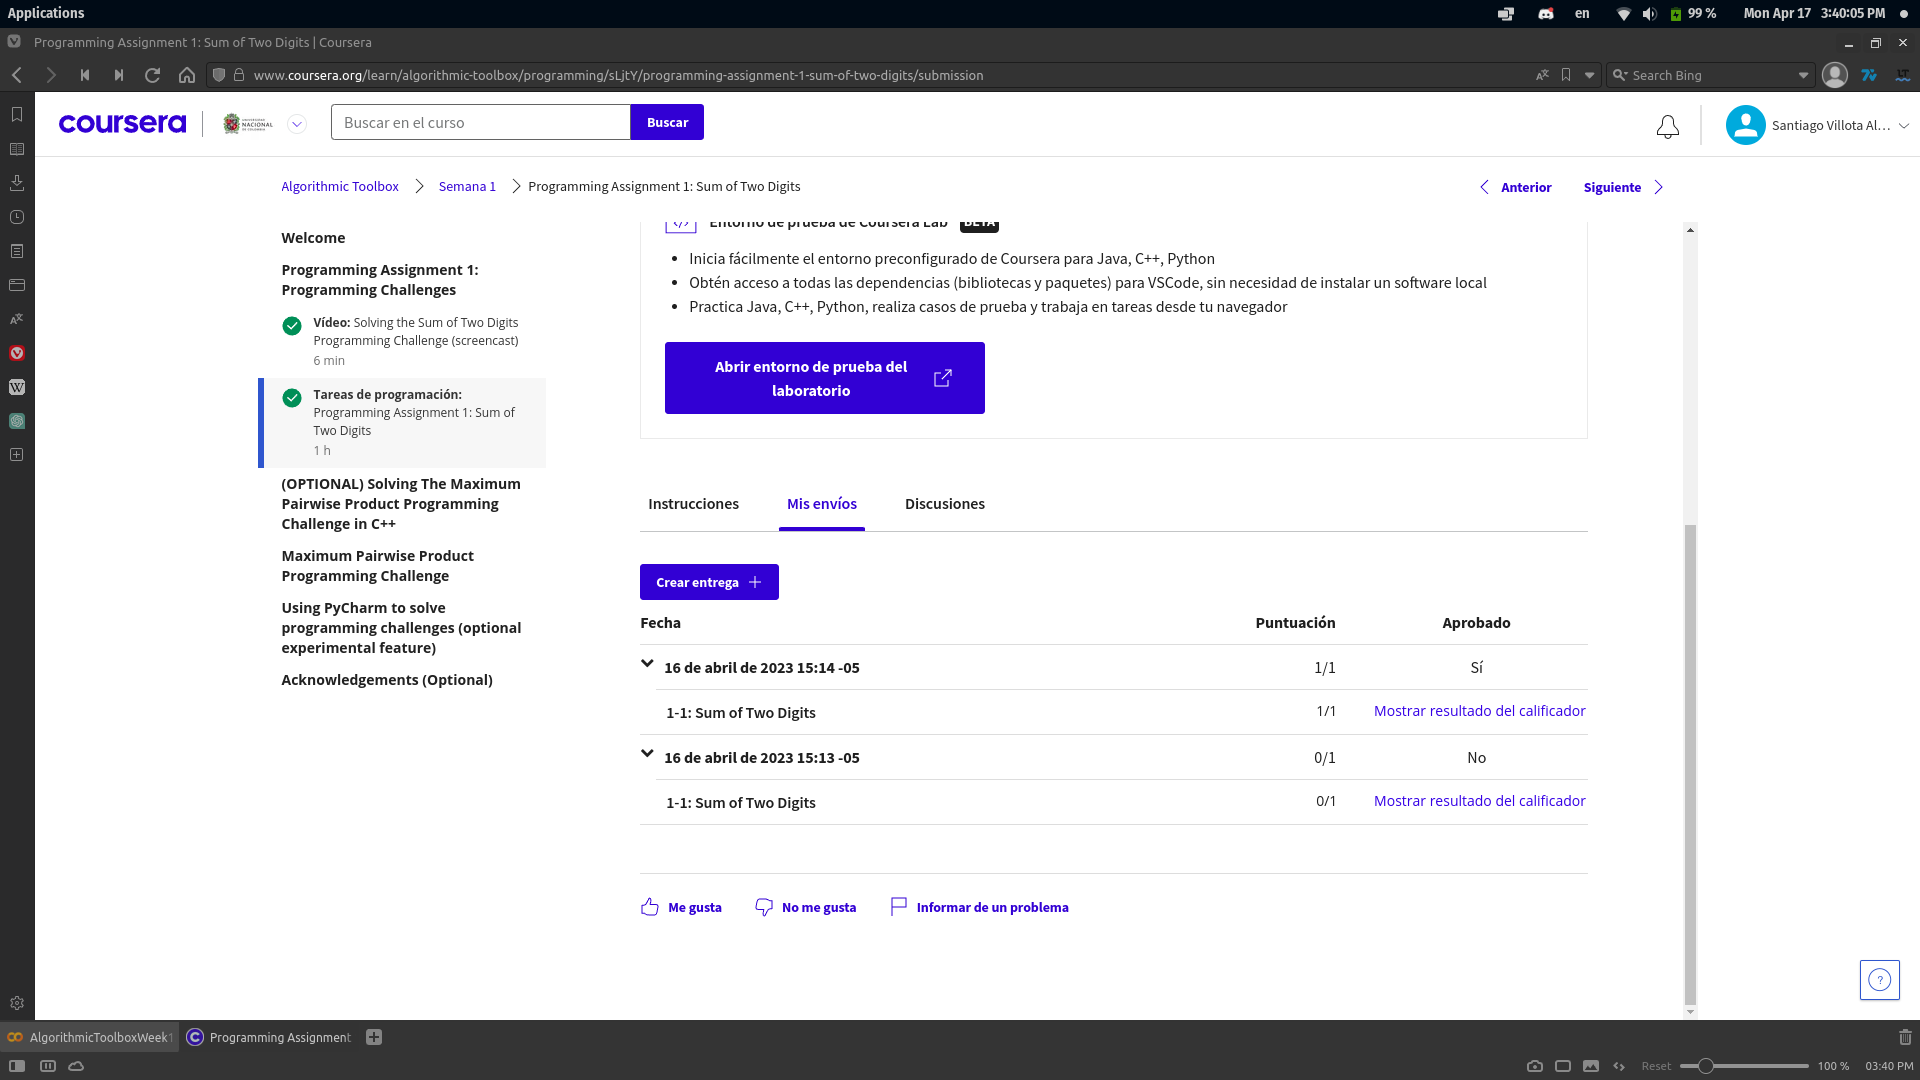

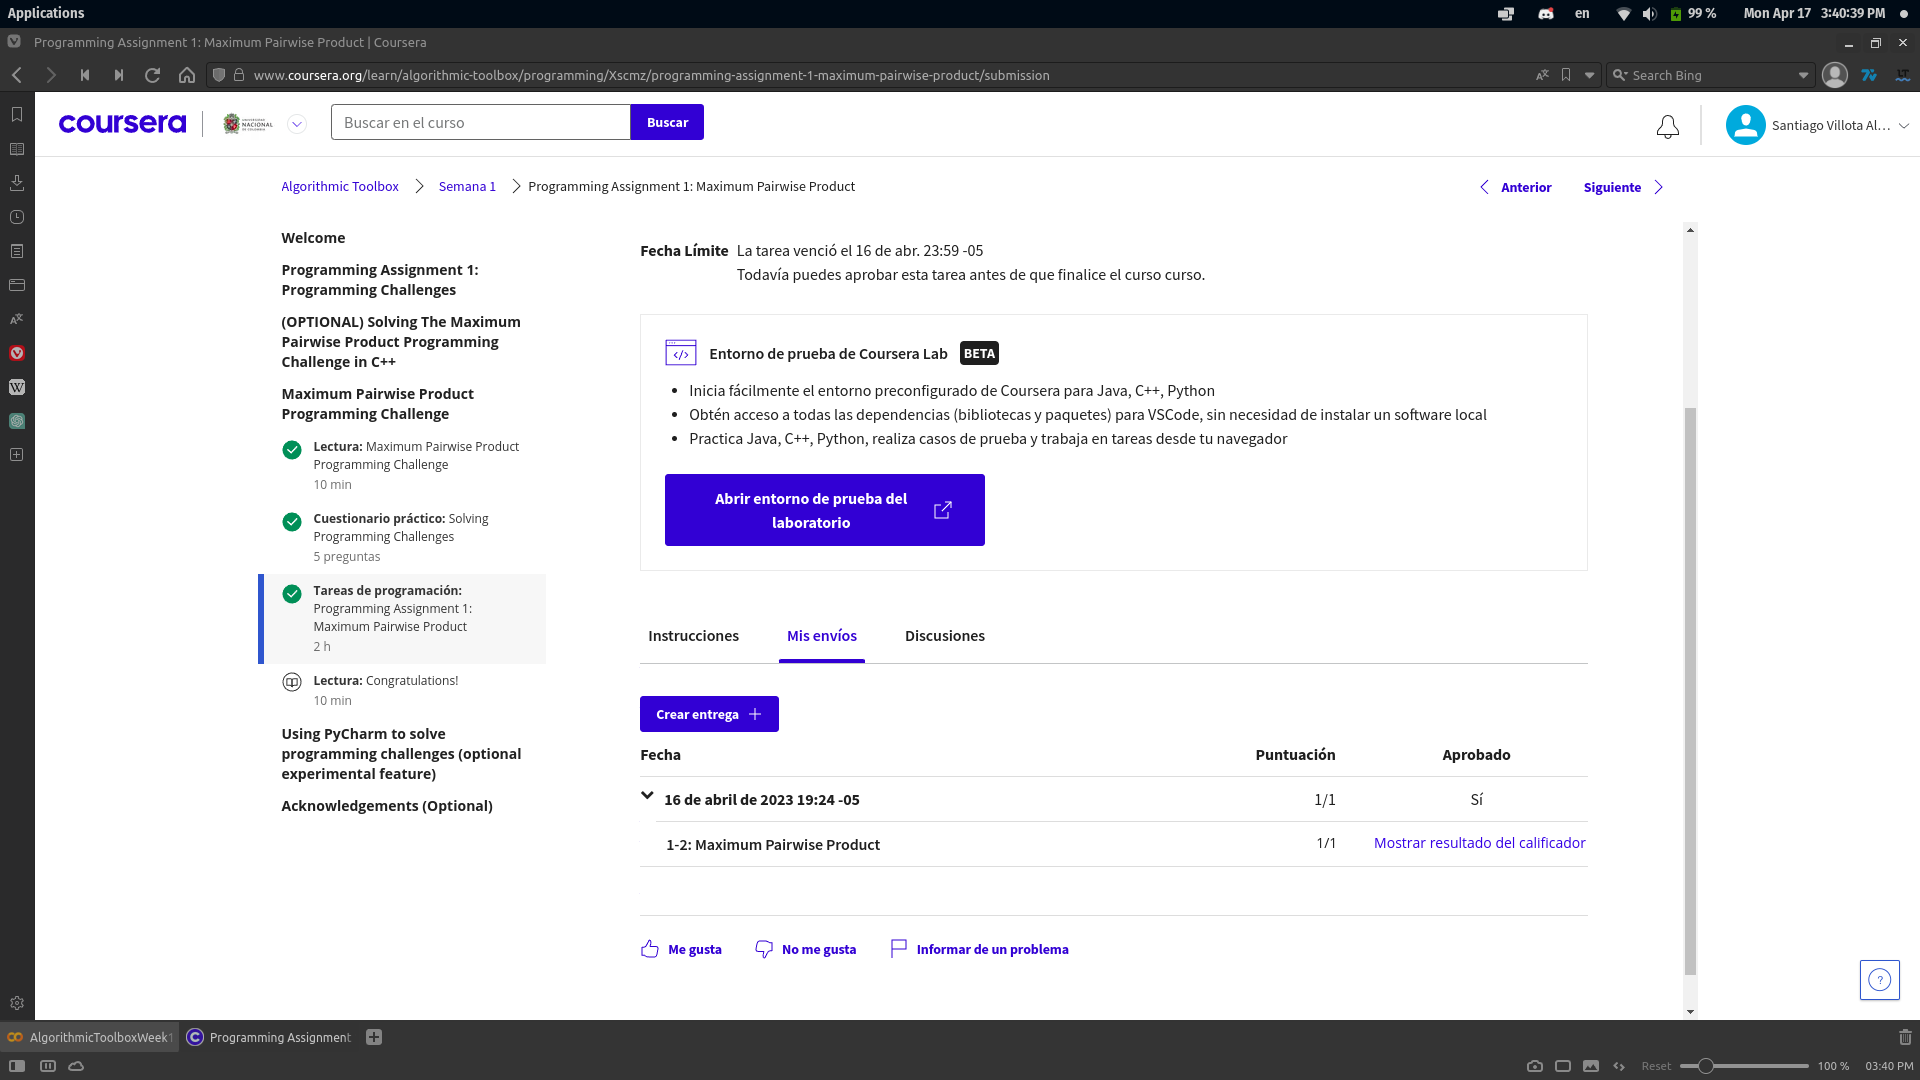

# Codeforces problem https://codeforces.com/contest/1619/problem/A 

Solve the problem in Colab, submit the solution to Codeforces and add a screenshoot of the submission.

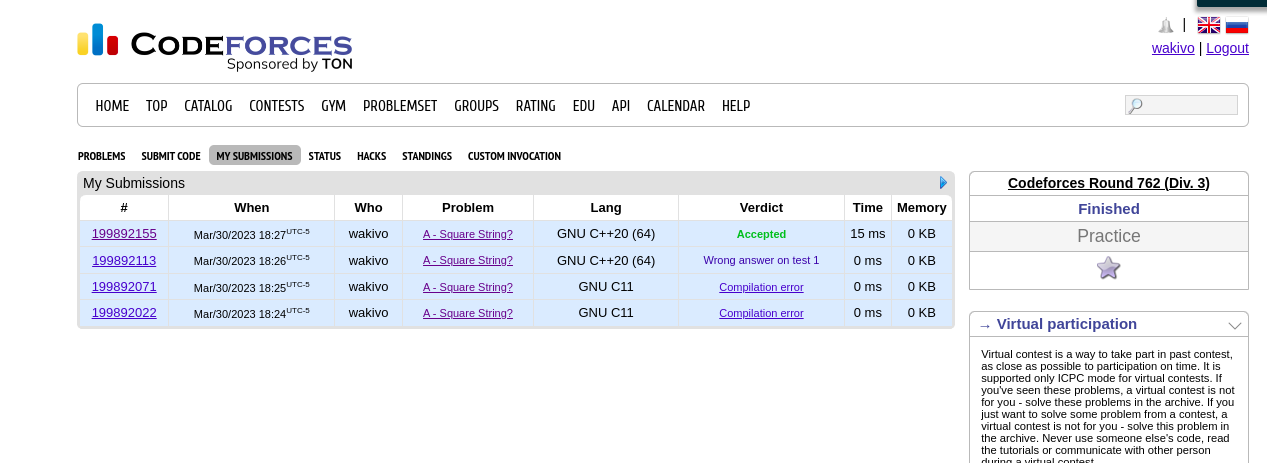

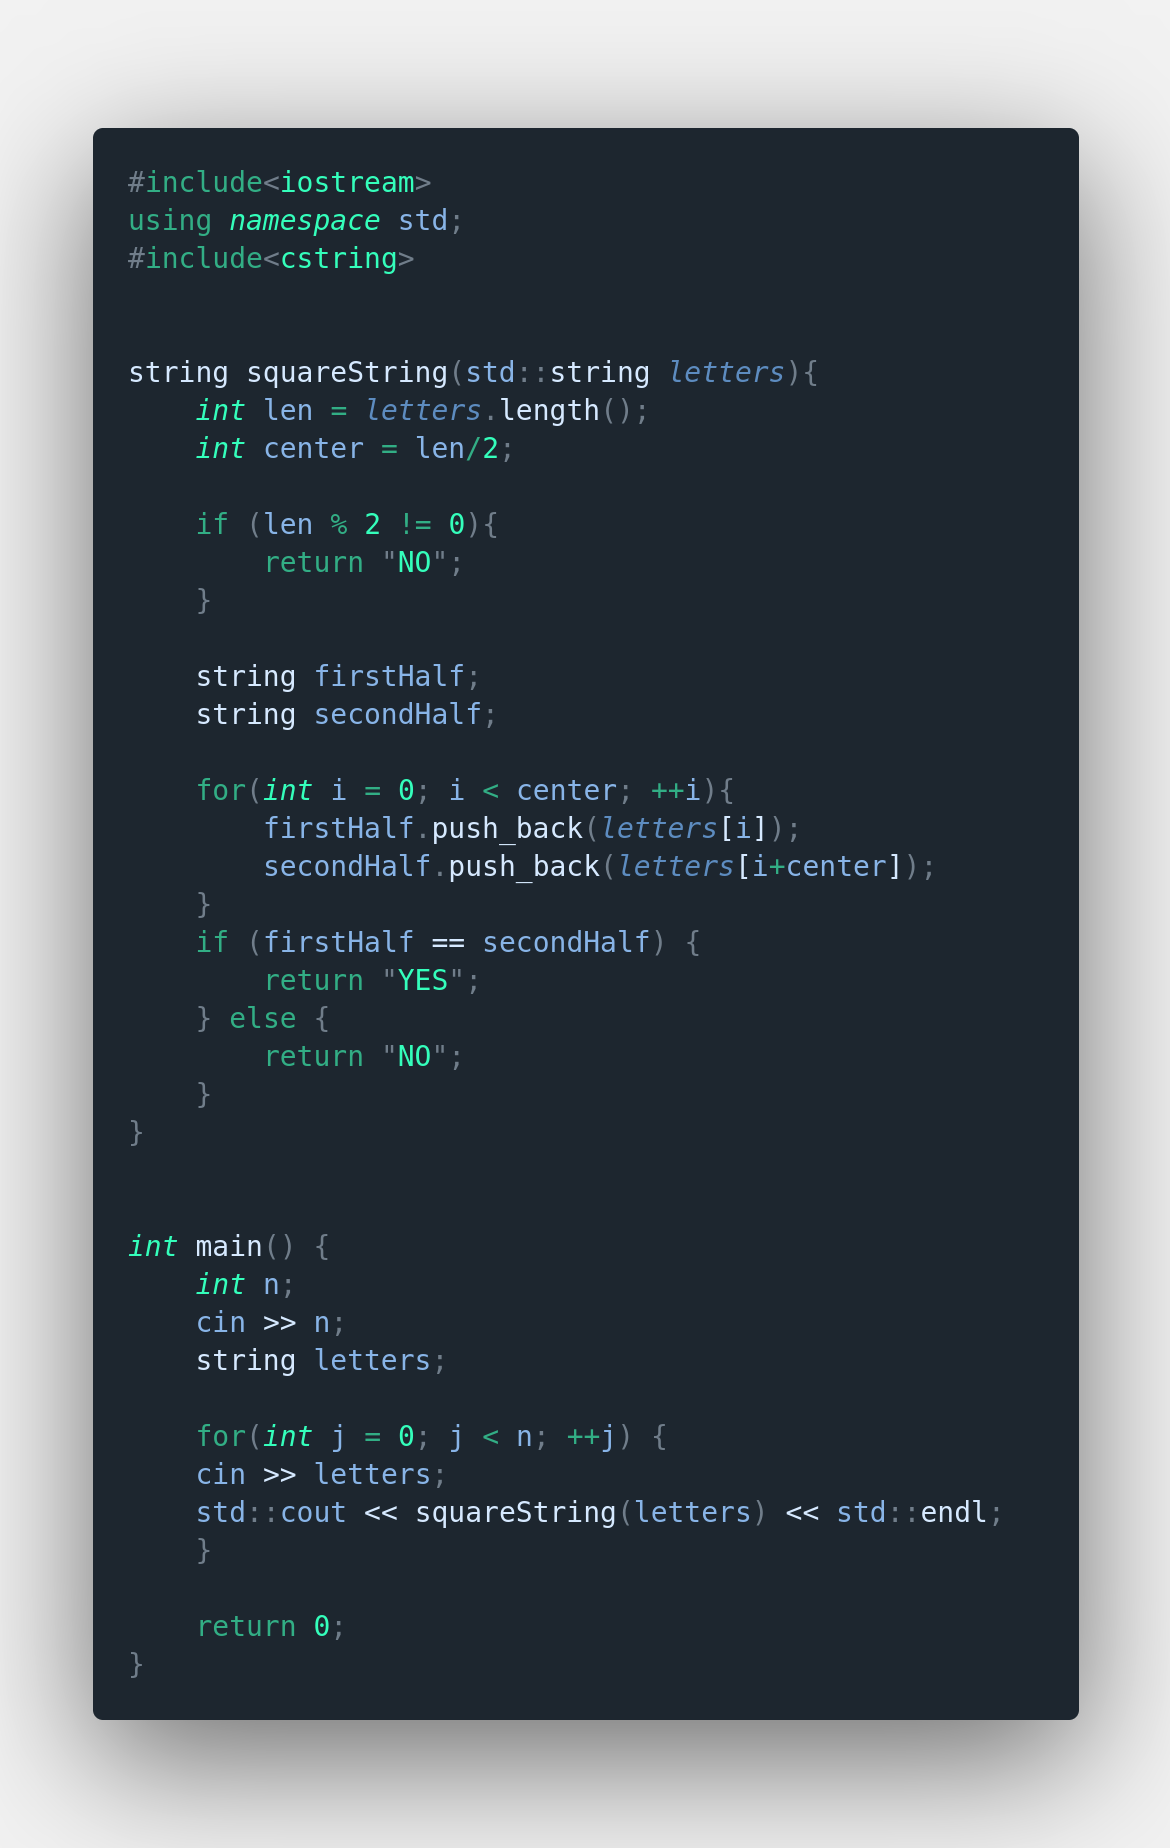